# Section 0 问题描述与完成项目流程

## 1. 问题描述


<img src="default.png" width="20%"></img>

在该项目中，你将使用强化学习算法，实现一个自动走迷宫机器人。

1. 如上图所示，智能机器人显示在右上角。在我们的迷宫中，有陷阱（红色炸弹）及终点（蓝色的目标点）两种情景。机器人要尽量避开陷阱、尽快到达目的地。
2. 小车可执行的动作包括：向上走 `u`、向右走 `r`、向下走 `d`、向左走 `l`。
3. 执行不同的动作后，根据不同的情况会获得不同的奖励，具体而言，有以下几种情况。
    - 撞到墙壁：-10
    - 走到终点：50
    - 走到陷阱：-30
    - 其余情况：-0.1
4. 我们需要通过修改 `robot.py` 中的代码，来实现一个 Q Learning 机器人，实现上述的目标。

## 2. 完成项目流程

1. 配置环境，使用 `envirnment.yml` 文件配置名为 `robot-env` 的 conda 环境，具体而言，你只需转到当前的目录，在命令行/终端中运行如下代码，稍作等待即可。
```
conda env create -f envirnment.yml
```
安装完毕后，在命令行/终端中运行 `source activate robot-env`（Mac/Linux 系统）或 `activate robot-env`（Windows 系统）激活该环境。

2. 阅读 `main.ipynb` 中的指导完成项目，并根据指导修改对应的代码，生成、观察结果。
3. 导出代码与报告，上传文件，提交审阅并优化。
---

---

# Section 1 算法理解


## 1. 1 强化学习总览

强化学习作为机器学习算法的一种，其模式也是让智能体在“训练”中学到“经验”，以实现给定的任务。但不同于监督学习与非监督学习，在强化学习的框架中，我们更侧重通过智能体与环境的**交互**来学习。通常在监督学习和非监督学习任务中，智能体往往需要通过给定的训练集，辅之以既定的训练目标（如最小化损失函数），通过给定的学习算法来实现这一目标。然而在强化学习中，智能体则是通过其与环境交互得到的奖励进行学习。这个环境可以是虚拟的（如虚拟的迷宫），也可以是真实的（自动驾驶汽车在真实道路上收集数据）。


在强化学习中有五个核心组成部分，它们分别是：**环境（Environment）**、**智能体（Agent）**、**状态（State）**、**动作（Action）**和**奖励（Reward）**。在某一时间节点 $t$：
    
- 智能体在从环境中感知其所处的状态 $s_t$
- 智能体根据某些准则选择动作 $a_t$
- 环境根据智能体选择的动作，向智能体反馈奖励 $r_{t+1}$

通过合理的学习算法，智能体将在这样的问题设置下，成功学到一个在状态 $s_t$ 选择动作 $a_t$ 的策略 $\pi (s_t) = a_t$。

---

**问题 1**：请参照如上的定义，描述出 “机器人走迷宫这个问题” 中强化学习五个组成部分对应的实际对象：

- **环境** : 
    - 迷宫
- **状态** : 
    - 炸弹
    - 目标
    - 平地
    - 撞到墙
- **动作** : 
    - 向上走 u
    - 向右走 r
    - 向下走 d
    - 向左走 l
- **奖励** : 
    - 撞到墙壁：-10
    - 走到终点：50
    - 走到陷阱：-30
    - 其余情况：-0.1

$$T(s^{'}, a, s) = P(s^{'}|a,s)$$


---

## 1.2 计算 Q 值 

在我们的项目中，我们要实现基于 Q-Learning 的强化学习算法。Q-Learning 是一个值迭代（Value Iteration）算法。与策略迭代（Policy Iteration）算法不同，值迭代算法会计算每个”状态“或是”状态-动作“的值（Value）或是效用（Utility），然后在执行动作的时候，会设法最大化这个值。因此，对每个状态值的准确估计，是我们值迭代算法的核心。通常我们会考虑**最大化动作的长期奖励**，即不仅考虑当前动作带来的奖励，还会考虑动作长远的奖励。

在 Q-Learning 算法中，我们把这个长期奖励记为 Q 值，我们会考虑每个 ”状态-动作“ 的 Q 值，具体而言，它的计算公式为：

$$
q(s_{t},a) = R_{t+1} + \gamma \times\max_a q(a,s_{t+1})
$$

也就是对于当前的“状态-动作” $(s_{t},a)$，我们考虑执行动作 $a$ 后环境给我们的奖励 $R_{t+1}$，以及执行动作 $a$ 到达 $s_{t+1}$后，执行任意动作能够获得的最大的Q值 $\max_a q(a,s_{t+1})$，$\gamma$ 为折扣因子。

不过一般地，我们使用更为保守地更新 Q 表的方法，即引入松弛变量 $alpha$，按如下的公式进行更新，使得 Q 表的迭代变化更为平缓。

$$
q(s_{t},a) = (1-\alpha) \times q(s_{t},a) + \alpha \times(R_{t+1} + \gamma \times\max_a q(a,s_{t+1}))
$$



---
<img src="default2.png" width="20%"></img>

**问题 2**：根据已知条件求 $q(s_{t},a)$，在如下模板代码中的空格填入对应的数字即可。


已知：如上图，机器人位于 $s_1$，行动为 `u`，行动获得的奖励与题目的默认设置相同。在 $s_2$ 中执行各动作的 Q 值为：`u`: -24，`r`: -13，`d`: -0.29、`l`: +40，$\gamma$ 取0.9。


$$
\begin{align}
q(s_{t},a) & = R_{t+1} + \gamma \times\max_a q(a,s_{t+1}) \\
 & =(0) + (0.9)*(40) \\
 & =(36)
\end{align}
$$

> $R_{t+1}$ 初始值为0

---

## 1.3 如何选择动作

在强化学习中，「探索-利用」问题是非常重要的问题。具体来说，根据上面的定义，我们会尽可能地让机器人在每次选择最优的决策，来最大化长期奖励。但是这样做有如下的弊端：
1. 在初步的学习中，我们的 Q 值会不准确，如果在这个时候都按照 Q 值来选择，那么会造成错误。
2. 学习一段时间后，机器人的路线会相对固定，则机器人无法对环境进行有效的探索。

因此我们需要一种办法，来解决如上的问题，增加机器人的探索。由此我们考虑使用 epsilon-greedy 算法，即在小车选择动作的时候，以一部分的概率随机选择动作，以一部分的概率按照最优的 Q 值选择动作。同时，这个选择随机动作的概率应当随着训练的过程逐步减小。

---

**问题 3**：在如下的代码块中，实现 epsilon-greedy 算法的逻辑，并运行测试代码。

In [112]:
import numpy as np

actions = ['u','r','d','l']
qline = {'u':1.2, 'r':-2.1, 'd':-24.5, 'l':27}
epsilon = 0.3 # 以0.3的概率进行随机选择

def choose_action(epsilon):
    
    action = None
    if np.random.random() > epsilon: # 以某一概率
        action = np.random.choice(actions)
    else: 
        action = max(qline, key=qline.get) # 否则选择具有最大 Q 值的动作
    return action

In [113]:
# 检查下效果
choose_list = []
for i in range(0,10000):
    choose_list.append(choose_action(0.3))

for i in set(choose_list):
    print('count of {0}, {1}, {2}'.format(i, choose_list.count(i), choose_list.count(i)/10000))

count of u, 1784, 0.1784
count of l, 4707, 0.4707
count of d, 1770, 0.177
count of r, 1739, 0.1739


---

---

# Section 2 代码实现

## 2.1. `Maze` 类理解

我们首先引入了迷宫类 `Maze`，这是一个非常强大的函数，它能够根据你的要求随机创建一个迷宫，或者根据指定的文件，读入一个迷宫地图信息。

1. 使用 `Maze("file_name")` 根据指定文件创建迷宫，或者使用 `Maze(maze_size=(height,width))` 来随机生成一个迷宫。
2. 使用 `trap_number` 参数，在创建迷宫的时候，设定迷宫中陷阱的数量。
3. 直接键入迷宫变量的名字按回车，展示迷宫图像（如 `g=Maze("xx.txt")`，那么直接输入 `g` 即可。
4. 建议生成的迷宫尺寸，长在 6~12 之间，宽在 10～12 之间。

---

**问题 4**：在如下的代码块中，创建你的迷宫并展示。

In [114]:
from Maze import Maze
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## todo: 创建迷宫并展示

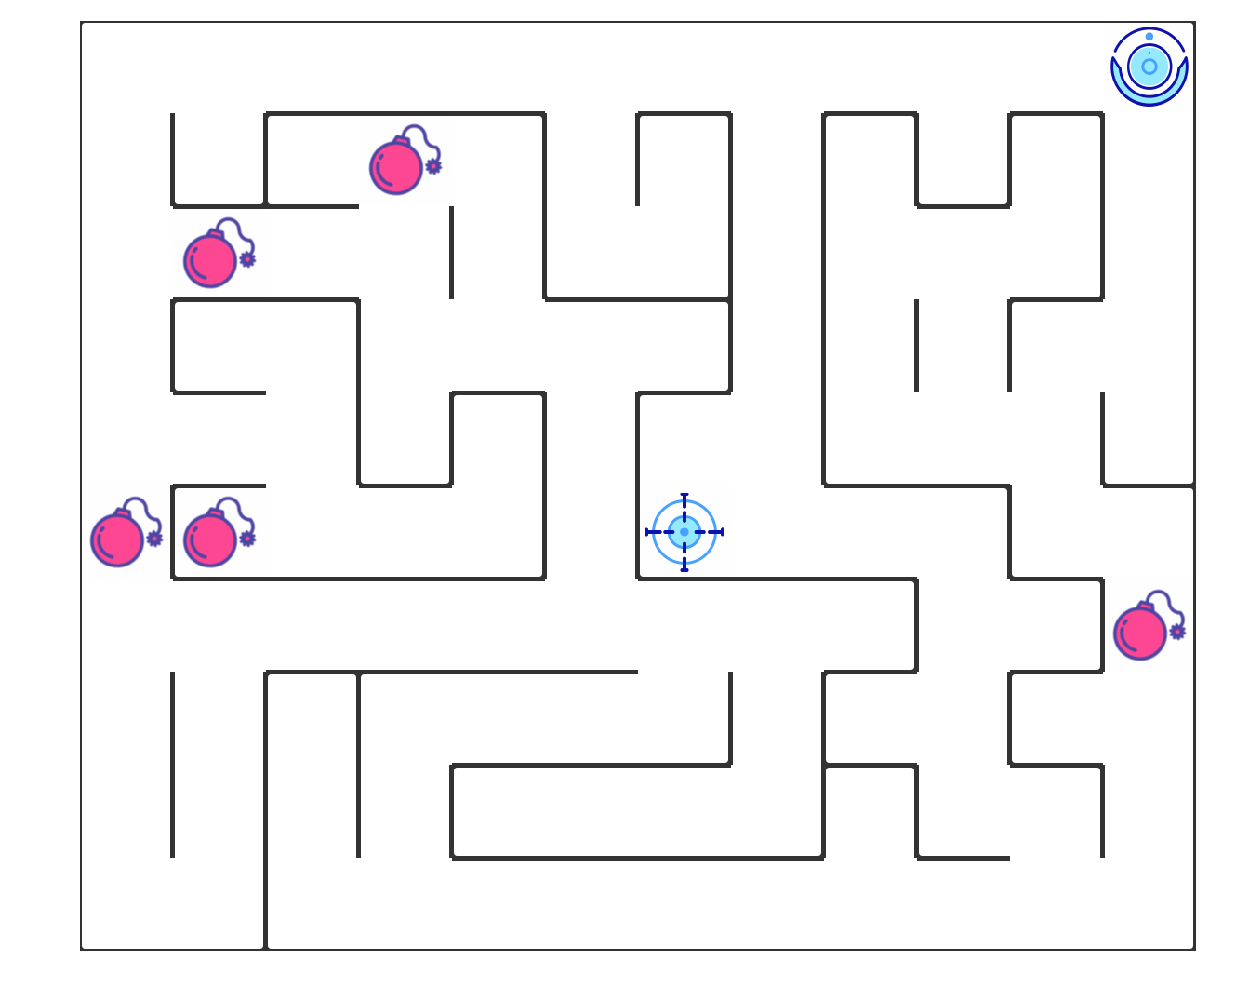

Maze of size (10, 12)

In [162]:
maze = Maze(maze_size=(10,12))
maze

In [163]:
help(Maze)

Help on class Maze in module Maze:

class Maze(builtins.object)
 |  Maze objects have several main attributes:
 |  - maze_data: wall conditions in every cells are coded as a 4-bit number,
 |      with a bit value taking 0 if there is a wall and 1 if there is no wall.
 |      The 1s register corresponds with a square's top edge, 2s register the
 |      right edge, 4s register the bottom edge, and 8s register the left edge.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, from_file=None, maze_size=None, trap_number=5, unstable_action=False)
 |      You can construct a map from given file or just generating a random one.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  draw_current_maze(self)
 |  
 |  get_raw_maze_img(self)
 |  
 |  is_permissible(self, location, direction)
 |      Returns a boolean designating whether or not a cell is passable in the
 |      given direction. Cell is input as a tuple. Directions is input as single
 |      letter 'u', 'r', 'd', 'l'.
 |  
 

---

你可能已经注意到，在迷宫中我们已经默认放置了一个机器人。实际上，我们为迷宫配置了相应的 API，来帮助机器人的移动与感知。其中你随后会使用的两个 API 为 `maze.sense_robot()` 及 `maze.move_robot()`。

1. `maze.sense_robot()` 为一个无参数的函数，输出机器人在迷宫中目前的位置。
2. `maze.move_robot(direction)` 对输入的移动方向，移动机器人，并返回对应动作的奖励值。

---

**问题 5**：随机移动机器人，并记录下获得的奖励，展示出机器人最后的位置。

In [164]:
# 这里要再生成的迷宫后面使用方法（解释有点简单，开始没get到）
# 输出状态
# 先初始化机器人
maze.place_robot()
maze.sense_robot()

(0, 11)

(3, 1)
None
(3, 1)
None
(3, 2)
None
(3, 1)
None
(3, 1)
None
(3, 1)
None
(3, 1)
None
(3, 1)
None
(3, 1)
None
(3, 1)
None
(3, 1)


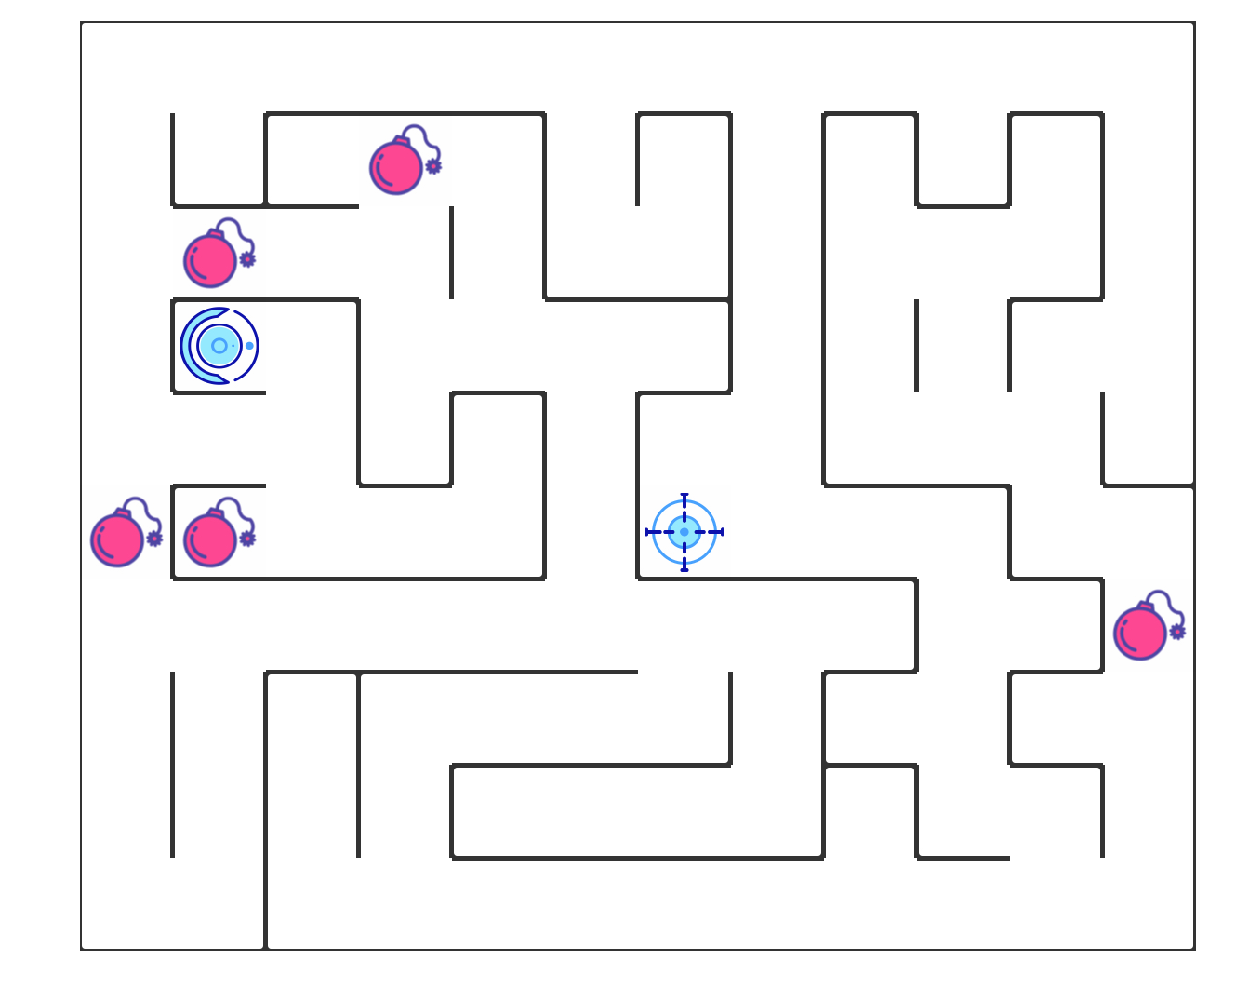

Maze of size (10, 12)
(3, 1)
[None, None, None, None, None, None, None, None, None, None]


In [169]:
rewards = []

## 循环、随机移动机器人10次，记录下奖励
for i in range(10):
    maze.move_robot(choose_action(0.3))
    print(maze.sense_robot())
    reward = maze.set_reward()
    print(reward)
    rewards.append(reward)
    
## 输出机器人最后的位置

print(maze.sense_robot())

## 打印迷宫，观察机器人位置
print(maze)
print(maze.sense_robot())
print(rewards)

## 2.2. `Robot` 类实现

`Robot` 类是我们需要重点实现的部分。在这个类中，我们需要实现诸多功能，以使得我们成功实现一个强化学习智能体。总体来说，之前我们是人为地在环境中移动了机器人，但是现在通过实现 `Robot` 这个类，机器人将会自己移动。通过实现学习函数，`Robot` 类将会学习到如何选择最优的动作，并且更新强化学习中对应的参数。

首先 `Robot` 有多个输入，其中 `alpha=0.5, gamma=0.9, epsilon0=0.5` 表征强化学习相关的各个参数的默认值，这些在之前你已经了解到，`Maze` 应为机器人所在迷宫对象。

随后观察 `Robot.update` 函数，它指明了在每次执行动作时，`Robot` 需要执行的程序。按照这些程序，各个函数的功能也就明了了。

最后你需要实现 `Robot.py` 代码中的8段代码，他们都在代码中以 `#TODO` 进行标注，你能轻松地找到他们。

---

**问题 6**：实现 `Robot.py` 中的8段代码，并运行如下代码检查效果（记得将 `maze` 变量修改为你创建迷宫的变量名）。



In [170]:
class Robot(object):

    def __init__(self, maze, alpha=0.5, gamma=0.9, epsilon0=0.5):
    # gamma是对未来奖励的惩罚
    # alpha是学习率，就是新结果更新到Q-Table的比率
    # epsilon是贪婪算法的随机率

        self.maze = maze
        self.valid_actions = self.maze.valid_actions
        self.state = None
        self.action = None

        # Set Parameters of the Learning Robot
        self.alpha = alpha
        self.gamma = gamma

        self.epsilon0 = epsilon0
        self.epsilon = epsilon0
        self.t = 0

        self.Qtable = {}
        self.reset()

    def reset(self):
        """
        Reset the robot
        """
        self.state = self.sense_state()
        self.create_Qtable_line(self.state)

    def set_status(self, learning=False, testing=False):
        """
        Determine whether the robot is learning its q table, or
        exceuting the testing procedure.
        """
        self.learning = learning
        self.testing = testing

    def update_parameter(self):
        """
        Some of the paramters of the q learning robot can be altered,
        update these parameters when necessary.
        """
        if self.testing:
            # TODO 1. No random choice when testing
            pass
        else:
            # TODO 2. Update parameters when learning
            self.t = self.t +1
            if self.epsilon < 0.05:
                self.epsilon = 0.05
            else:
                self.epsilon = self.epsilon - self.t*0.1
        return self.epsilon

    def sense_state(self):
        """
        Get the current state of the robot. In this
        """

        # TODO 3. Return robot's current state
        return self.maze.sense_robot()

    def create_Qtable_line(self, state):
        """
        Create the qtable with the current state
        """
        # TODO 4. Create qtable with current state
        # Our qtable should be a two level dict,
        # Qtable[state] ={'u':xx, 'd':xx, ...}
        # If Qtable[state] already exits, then do
        # not change it.
        if state in self.Qtable:  
        # Qtable是字典，调用字典的键值查找属性，如果有，什么都不做
            pass
        else:
            self.Qtable[state] = {'u':0.0, 'r':0.0, 'd':0.0, 'l':0.0} 
            # 没有的话，新增一个状态，赋值为0.0(float)

    def choose_action(self):
        """
        Return an action according to given rules
        """
        def is_random_exploration():

            # TODO 5. Return whether do random choice
            # hint: generate a random number, and compare
            # it with epsilon
            return random.random()<self.epsilon

        if self.learning:
            if is_random_exploration():
                # TODO 6. Return random choose aciton
                return random.choice(self.valid_actions)
            else:
                # TODO 7. Return action with highest q value
                return max(self.Qtable[self.state], key=self.Qtable[self.state].get)
        elif self.testing:
            # TODO 7. choose action with highest q value
            return max(self.Qtable[self.state], key=self.Qtable[self.state].get)
        else:
            # TODO 6. Return random choose aciton
            return random.choice(self.valid_actions)

    def update_Qtable(self, r, action, next_state):
        """
        Update the qtable according to the given rule.
        """
        if self.learning:
            pass
            # TODO 8. When learning, update the q table according
            # to the given rules
            q_predict = self.Qtable[self.state][action]
            q_target = r + self.gamma * float(max(self.Qtable[next_state].values()))
            self.Qtable[self.state][action] = self.Qtable[self.state][action] + self.alpha * (q_target - q_predict)

    def update(self):
        """
        Describle the procedure what to do when update the robot.
        Called every time in every epoch in training or testing.
        Return current action and reward.
        """
        self.state = self.sense_state() # Get the current state
        self.create_Qtable_line(self.state) # For the state, create q table line

        action = self.choose_action() # choose action for this state
        reward = self.maze.move_robot(action) # move robot for given action

        next_state = self.sense_state() # get next state
        self.create_Qtable_line(next_state) # create q table line for next state

        if self.learning and not self.testing:
            self.update_Qtable(reward, action, next_state) # update q table
            self.update_parameter() # update parameters

        return action, reward

('d', -10.0)


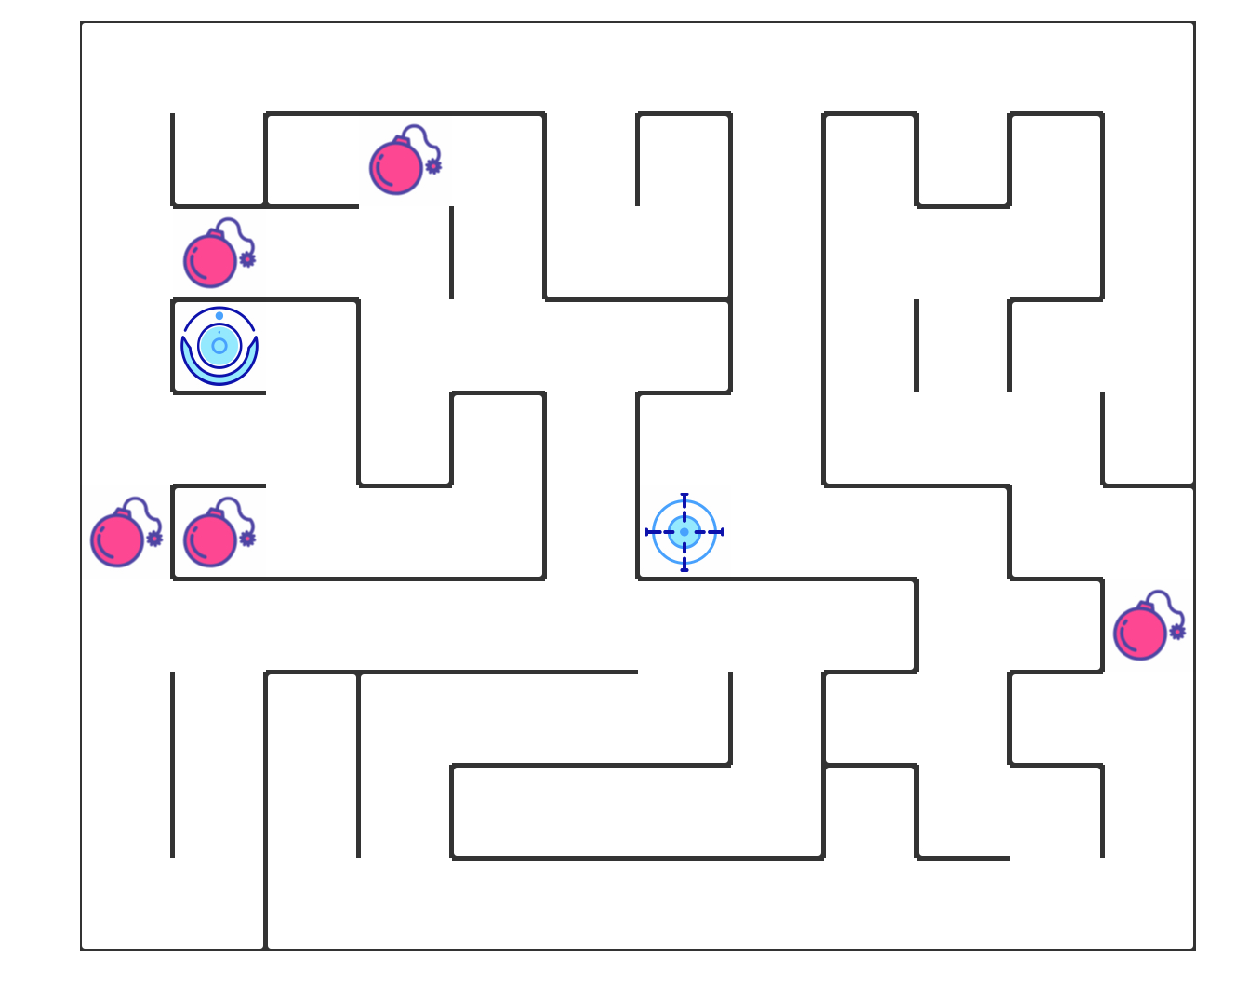

Maze of size (10, 12)

In [173]:
# from Robot import Robot
robot = Robot(maze)
robot.set_status(learning=True,testing=False)
print(robot.update())

maze

---

## 2.3 用 `Runner` 类训练 Robot

在实现了上述内容之后，我们就可以开始对我们 `Robot` 进行训练并调参了。我们为你准备了又一个非常棒的类 `Runner`，来实现整个训练过程及可视化。使用如下的代码，你可以成功对机器人进行训练。并且你会在当前文件夹中生成一个名为 `filename` 的视频，记录了整个训练的过程。通过观察该视频，你能够发现训练过程中的问题，并且优化你的代码及参数。

---

**问题 7**：尝试利用下列代码训练机器人，并进行调参。可选的参数包括：

- 训练参数
    - 训练次数 `epoch`
- 机器人参数：
    - `epsilon0` (epsilon 初值)
    - `epsilon`衰减（可以是线性、指数衰减，可以调整衰减的速度），你需要在 Robot.py 中调整
    - `alpha`
    - `gamma`
- 迷宫参数:
    - 迷宫大小
    - 迷宫中陷阱的数量

In [228]:
## 可选的参数：
epoch = 20
epsilon0 = 0.5
alpha = 0.5
gamma = 0.9
maze_size = (6,6)
trap_number = 1

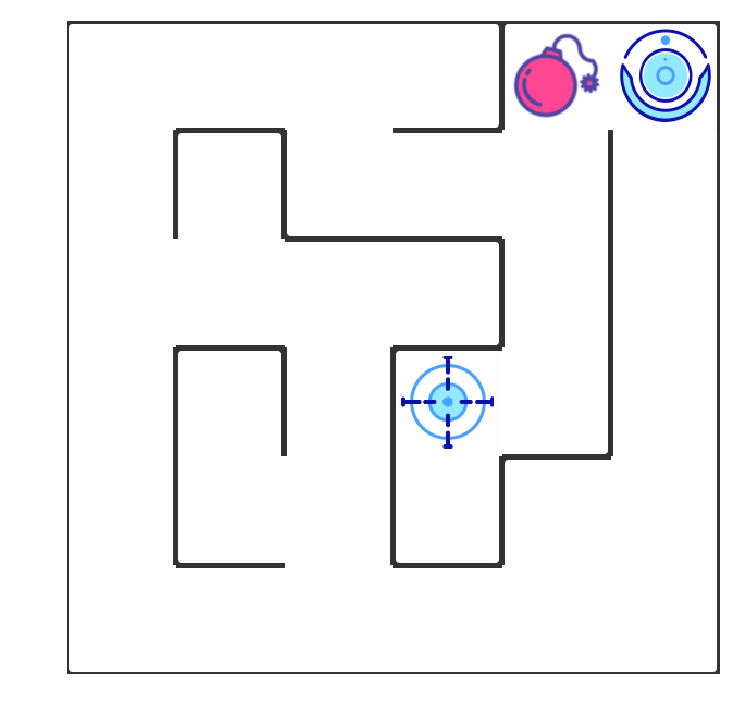

Maze of size (6, 6)


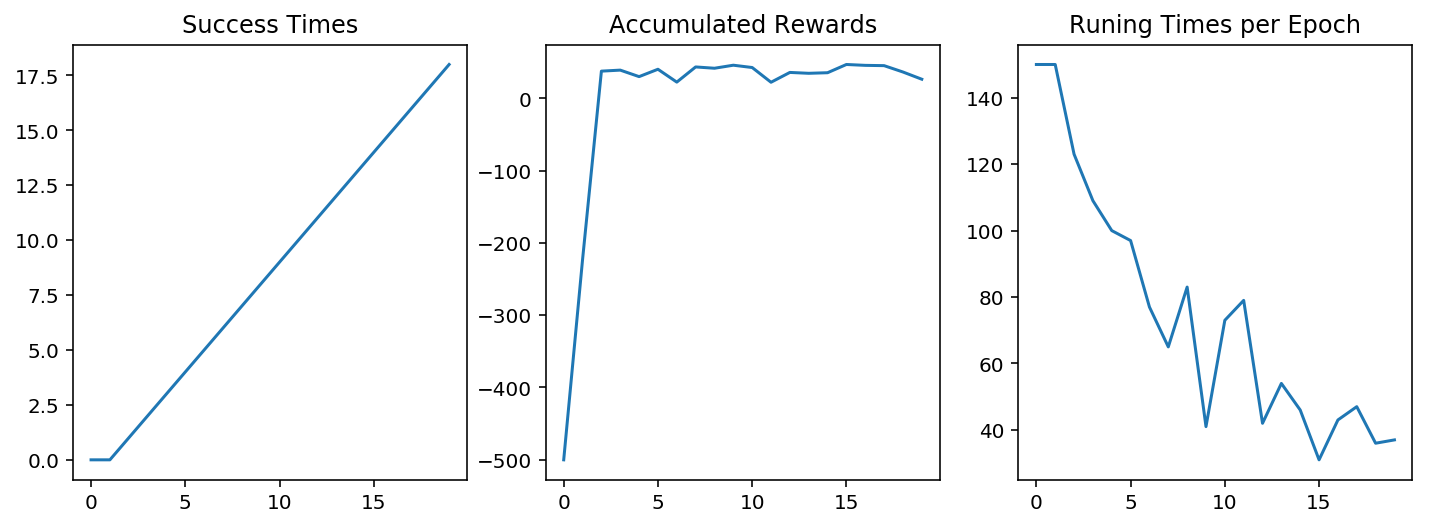

In [229]:
# base line (poor)
from Runner import Runner

g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner = Runner(r, g)
runner.run_training(epoch, display_direction=True)
# runner.generate_movie(filename = "final1.mp4") # 你可以注释该行代码，加快运行速度，不过你就无法观察到视频了。
print(g)
runner.plot_results()

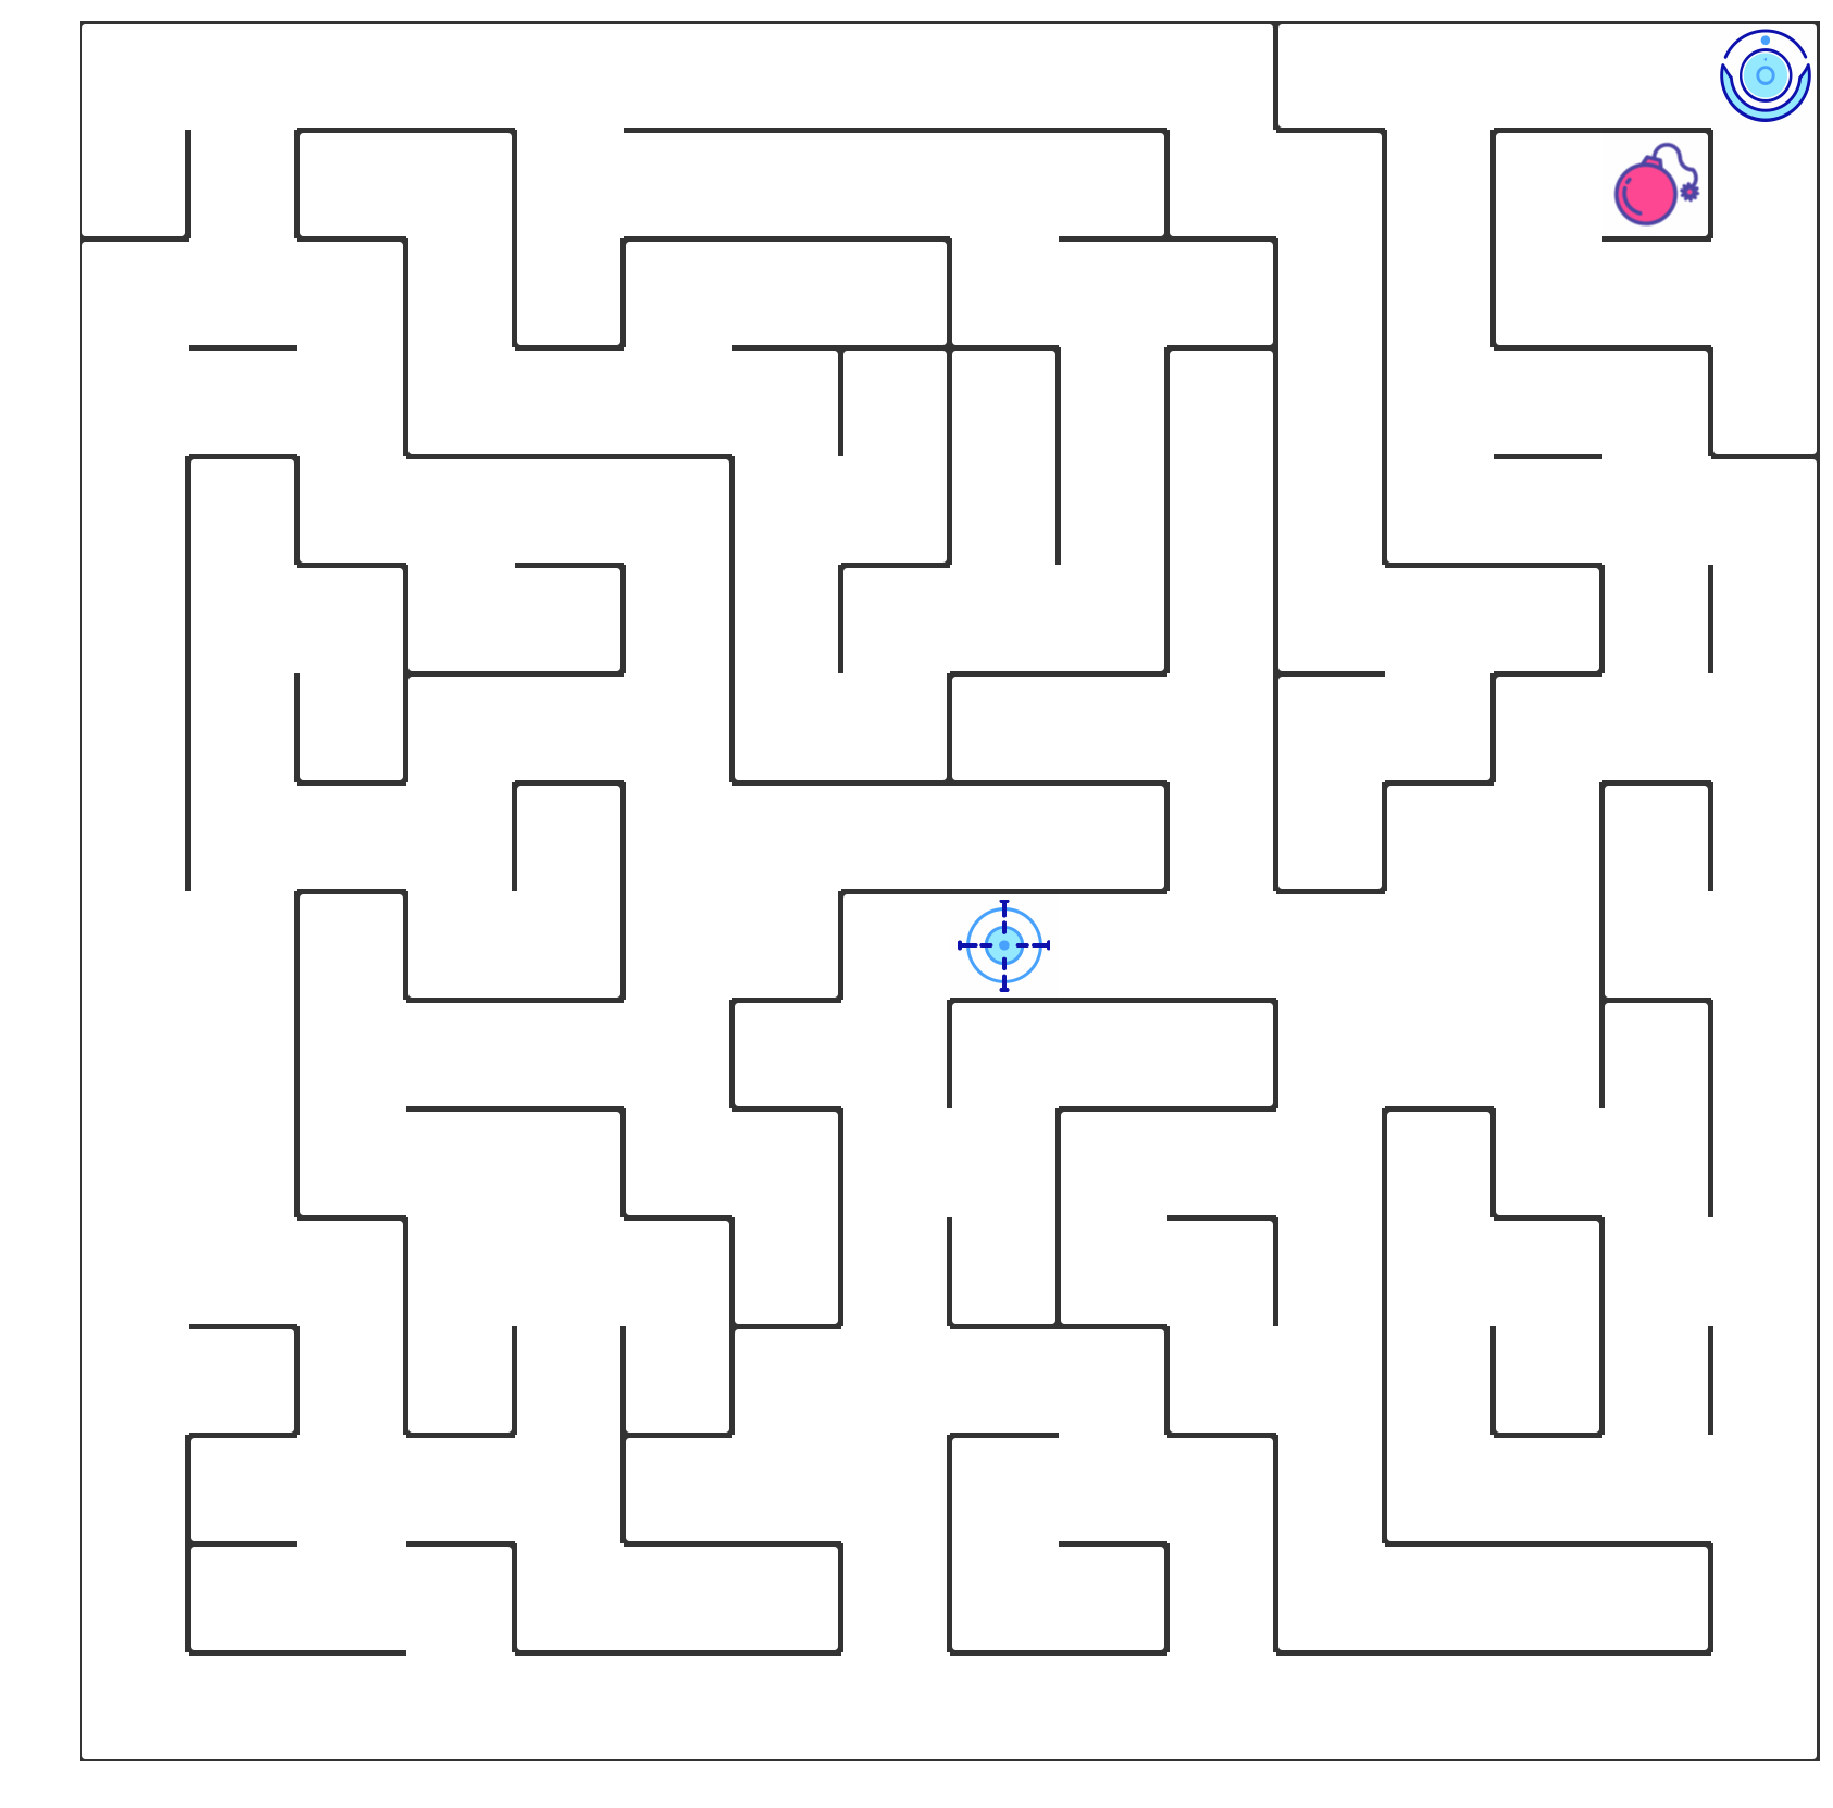

Maze of size (16, 16)


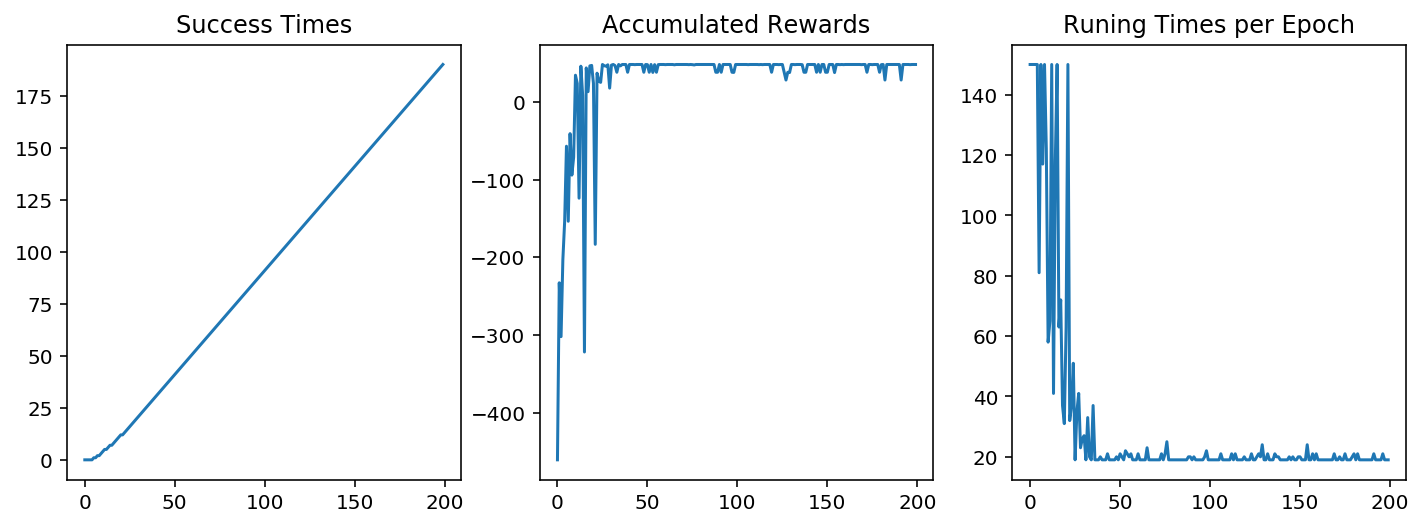

In [230]:
# try1a - diff at epoch\size
epoch = 200
epsilon0 = 0.5
alpha = 0.5
gamma = 0.9
maze_size = (16,16)
trap_number = 1

g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner1 = Runner(r, g)
runner1.run_training(epoch, display_direction=True)
print(g)
runner1.plot_results()

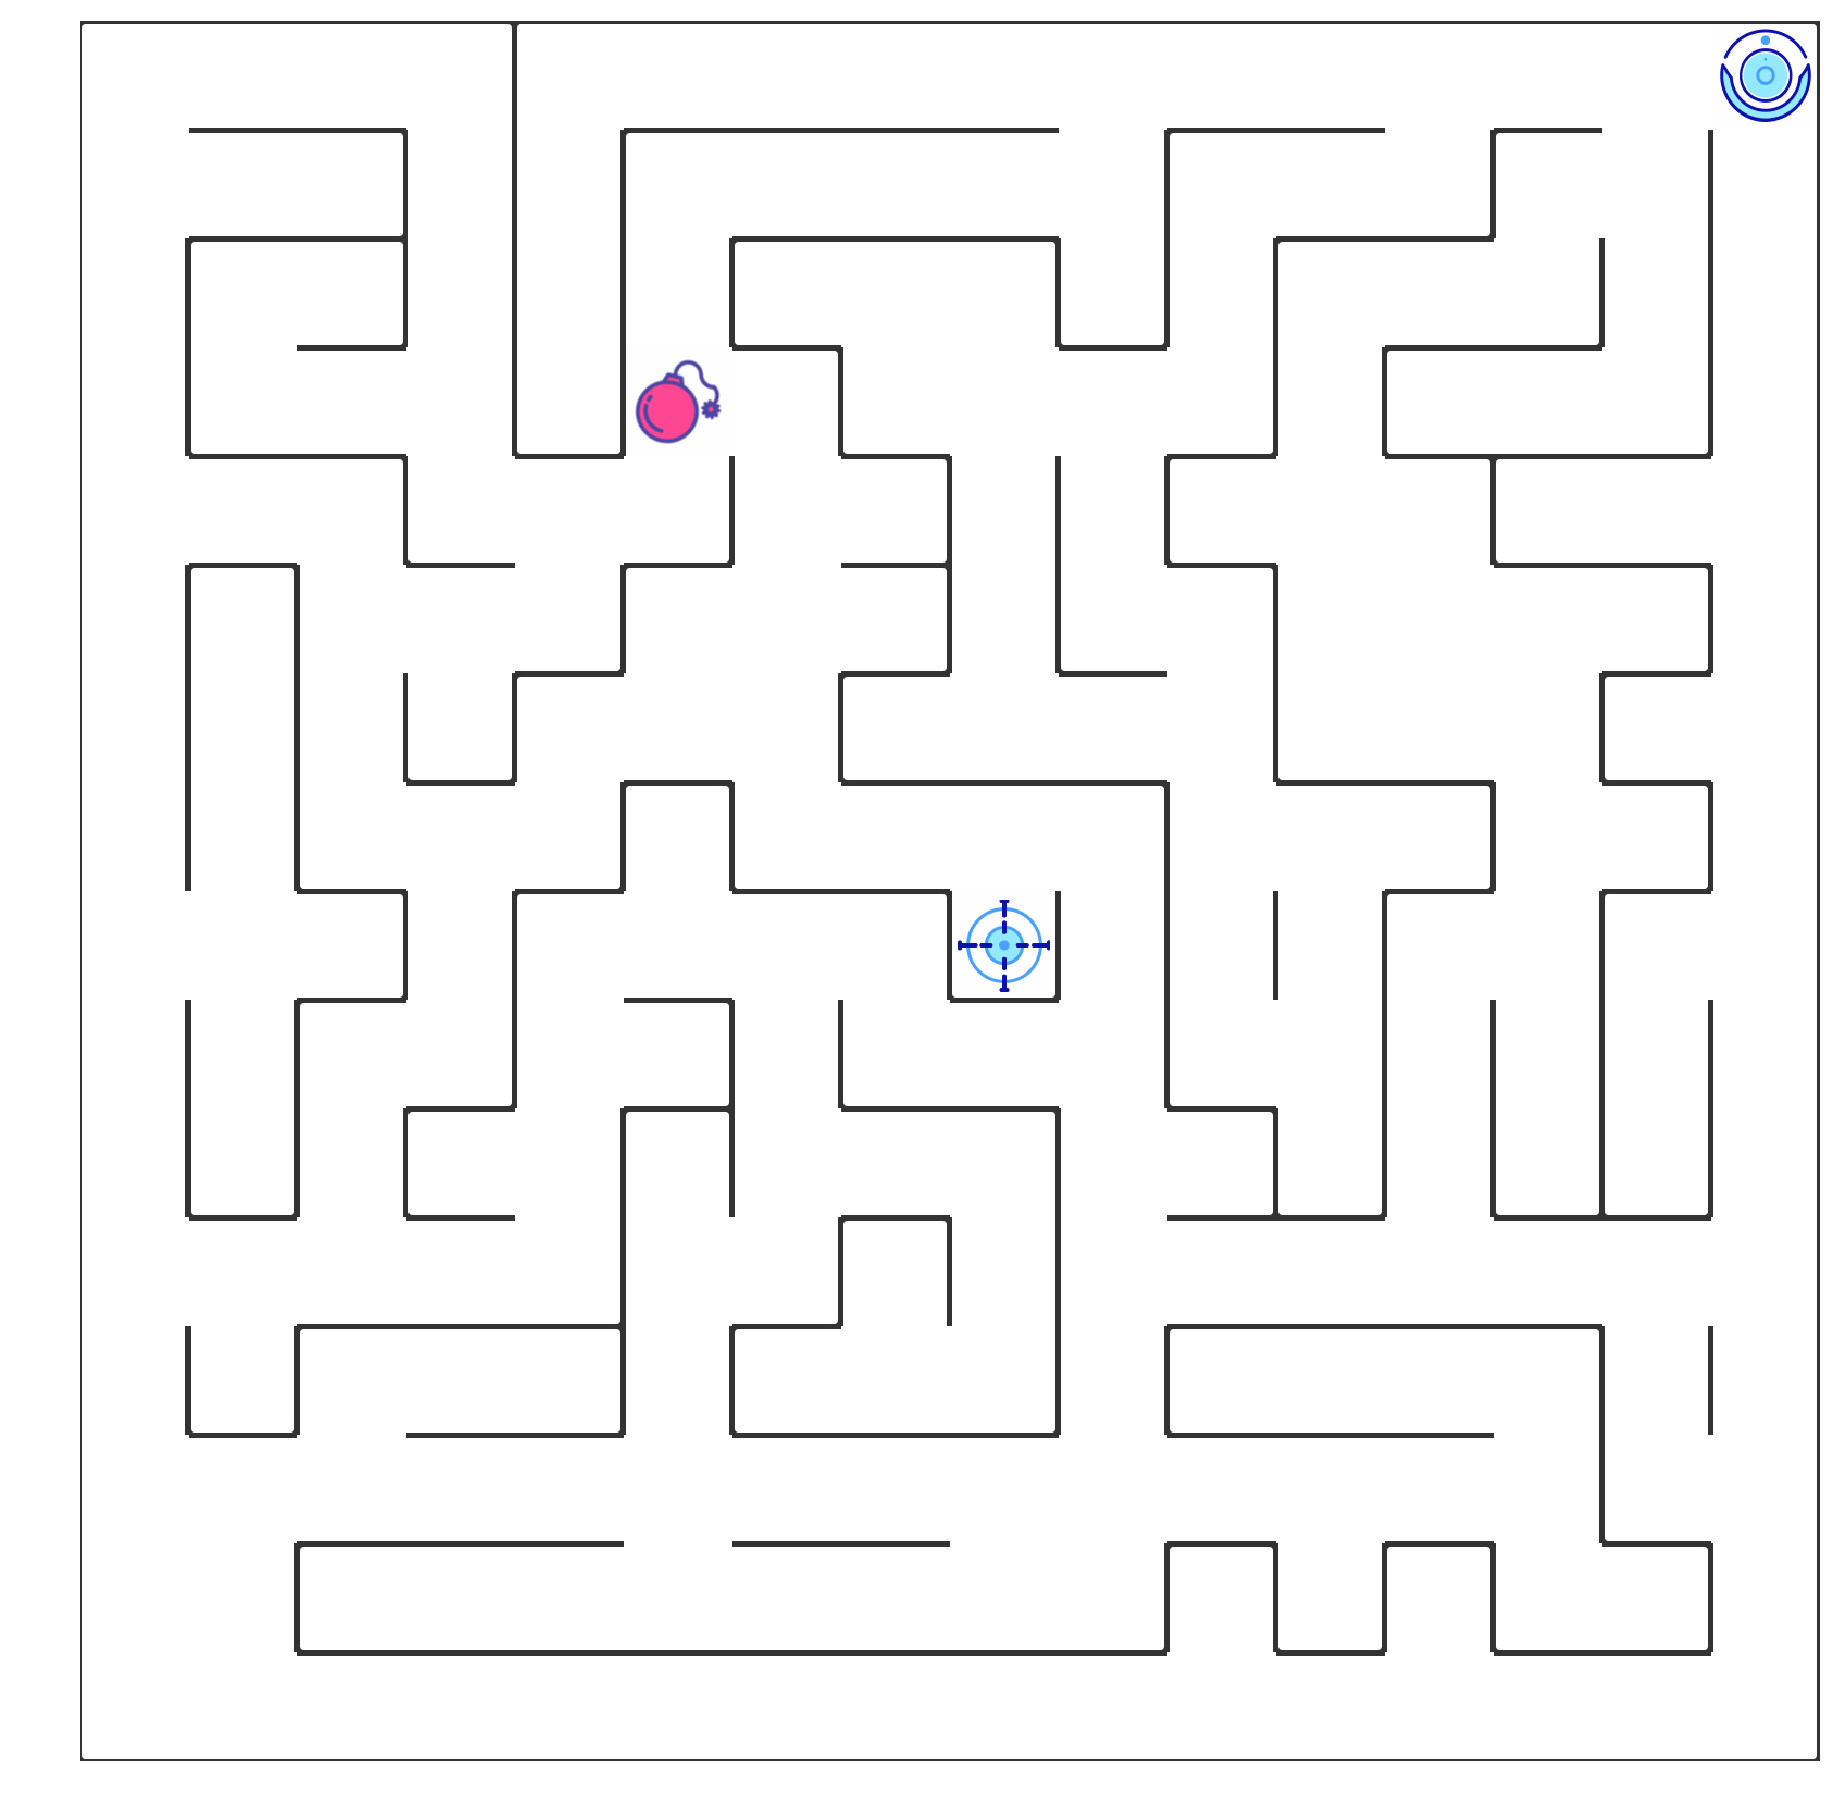

Maze of size (16, 16)


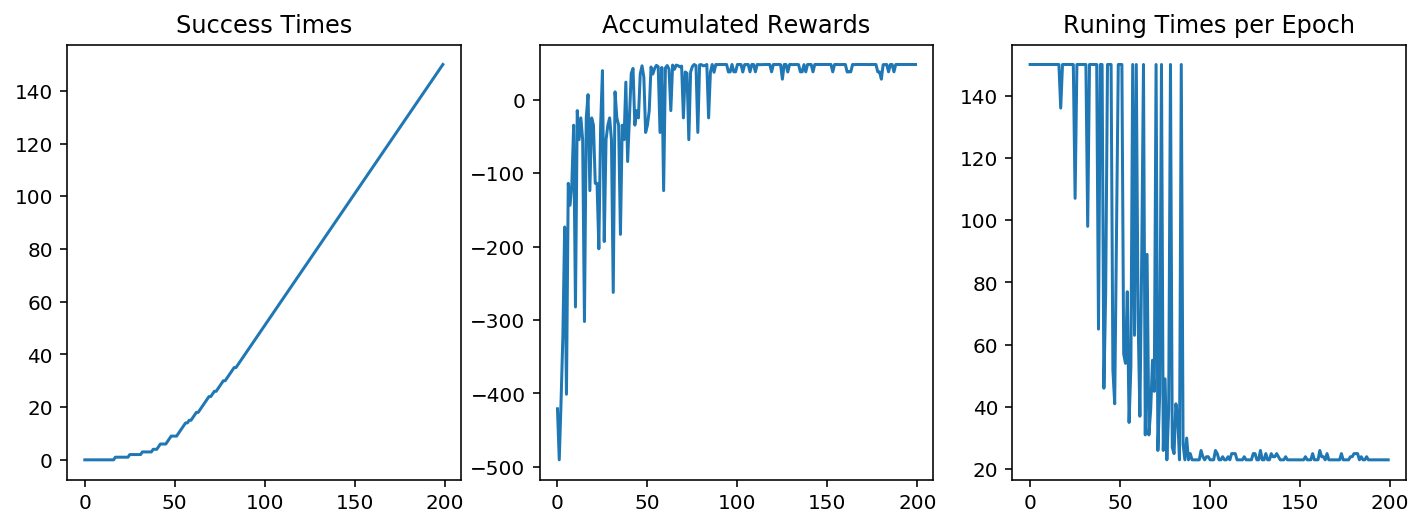

In [231]:
# try1b - plus diff at epsilon0
epoch = 200
epsilon0 = 0.1
alpha = 0.5
gamma = 0.9
maze_size = (16,16)
trap_number = 1

g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner1 = Runner(r, g)
runner1.run_training(epoch, display_direction=True)
print(g)
runner1.plot_results()

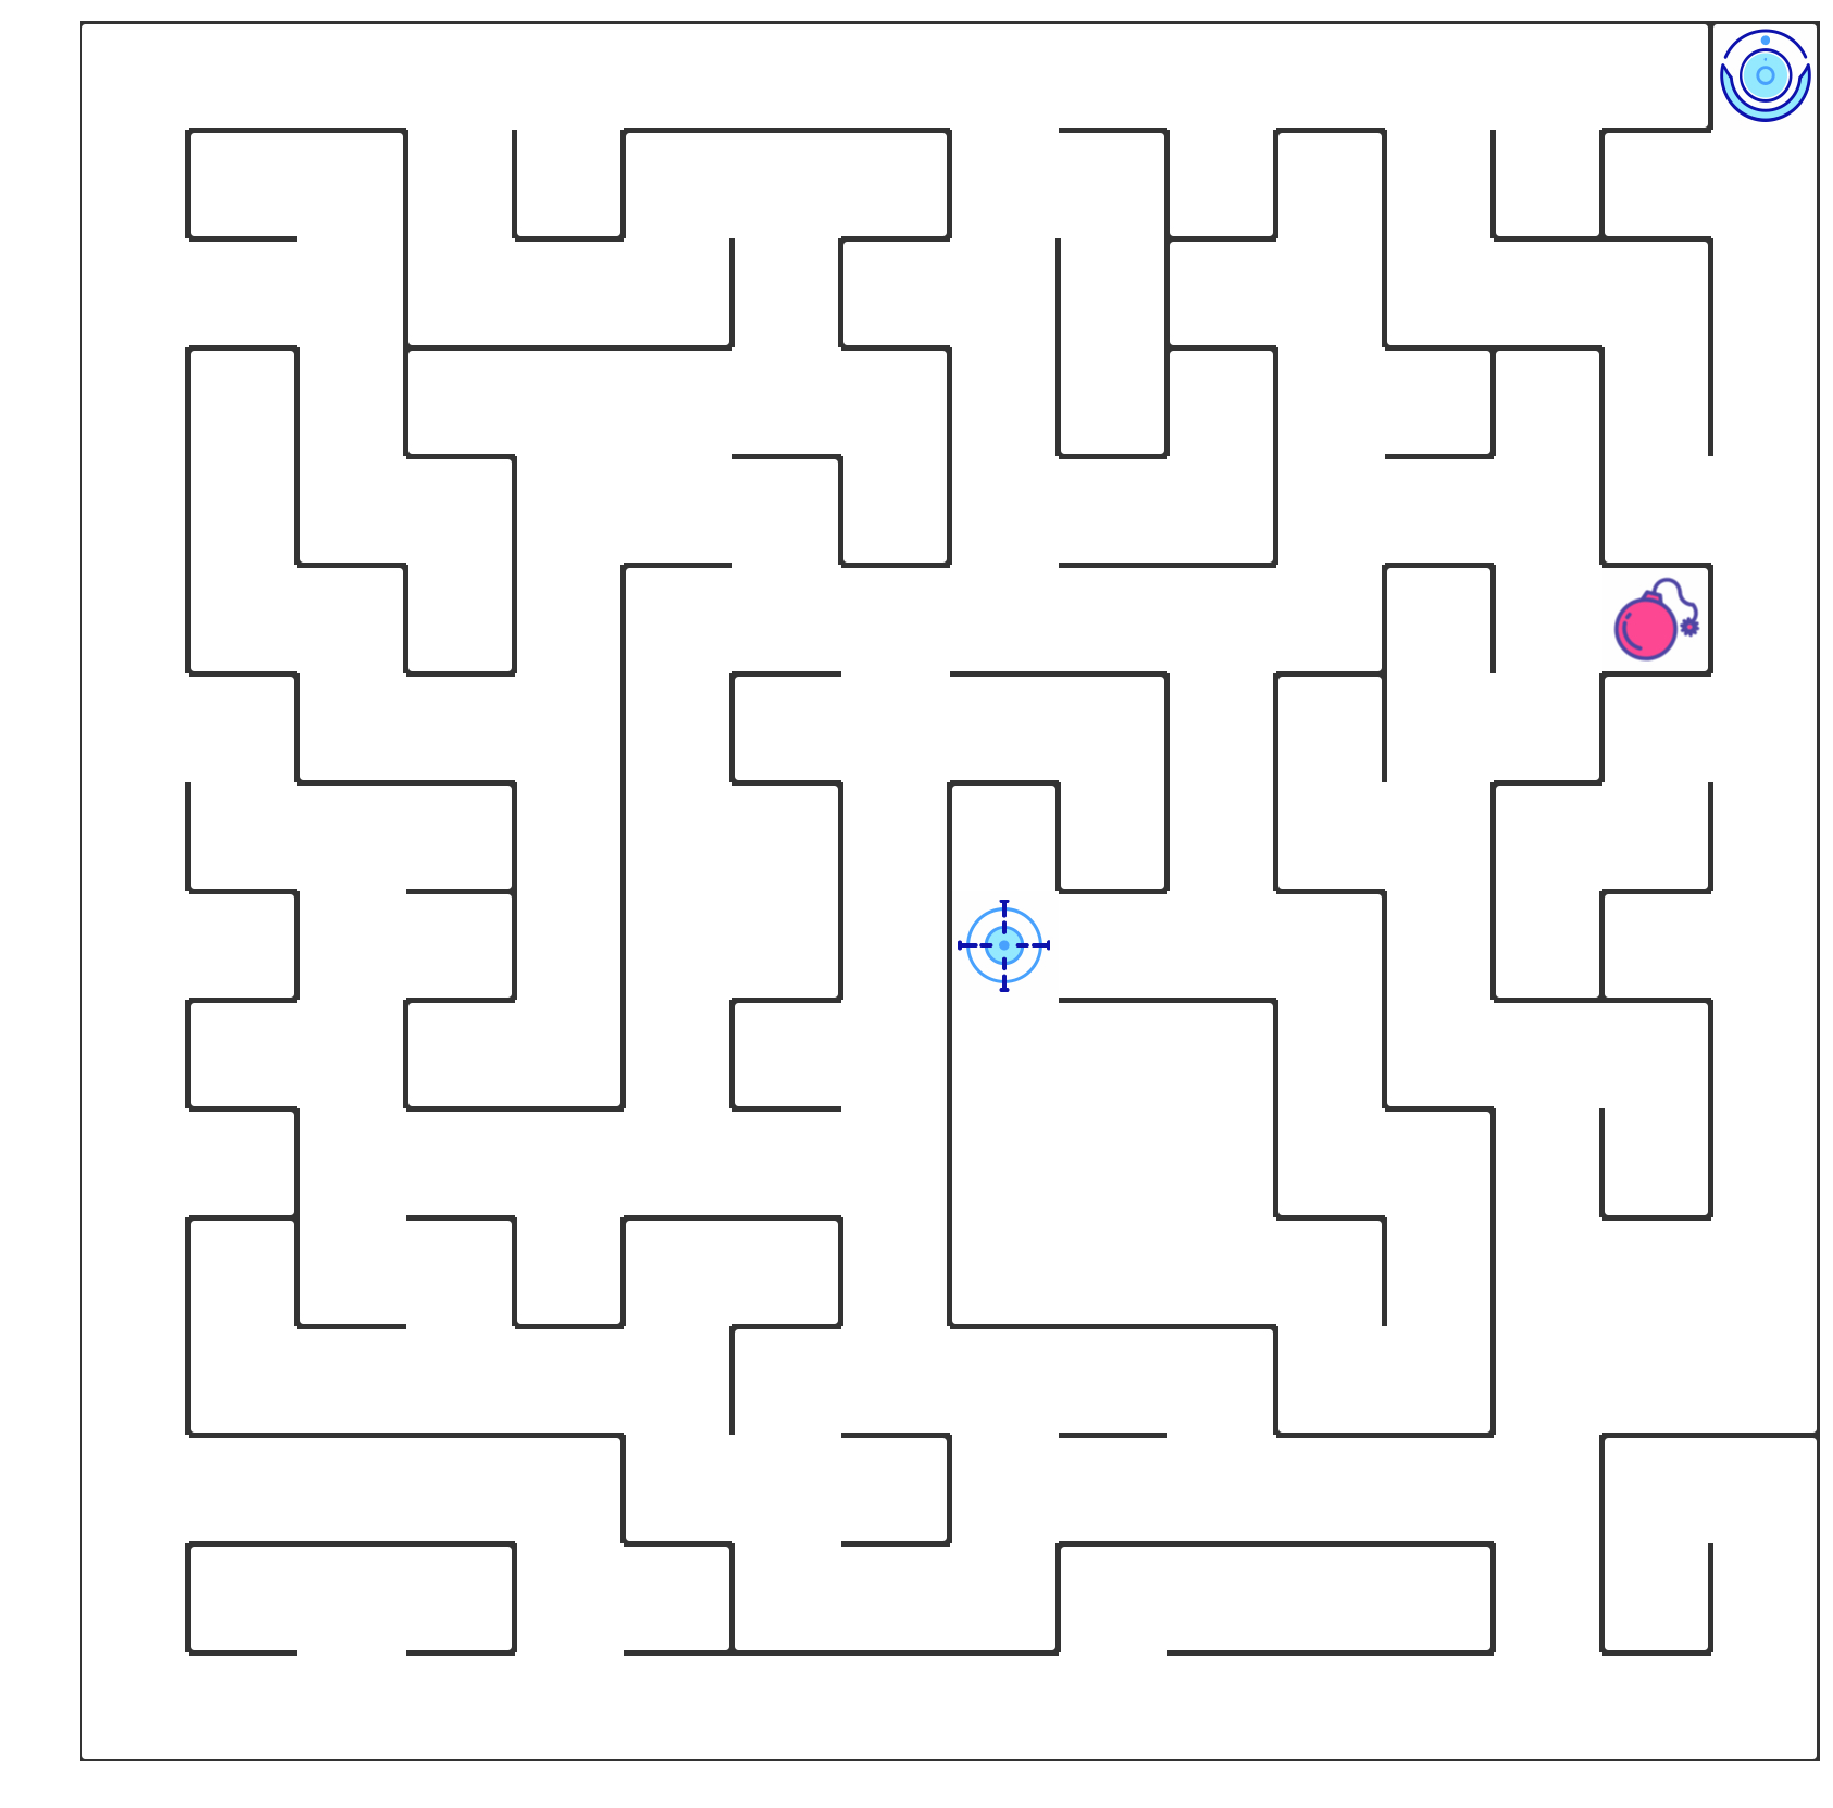

Maze of size (16, 16)


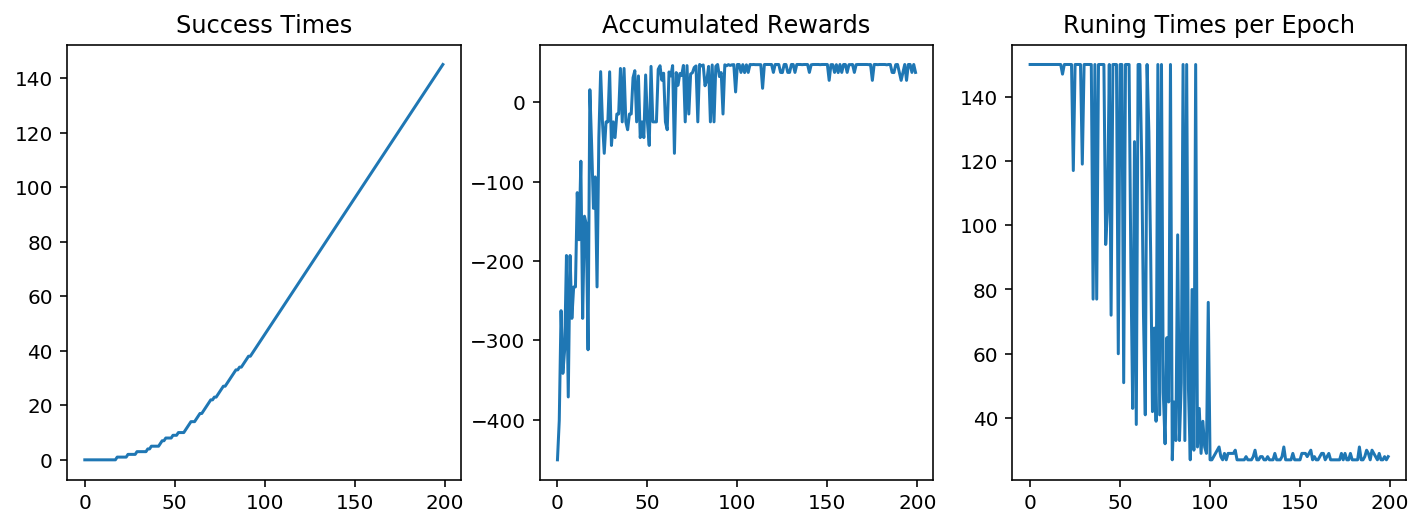

In [232]:
# try1c - plus diff at epsilon0
epoch = 200
epsilon0 = 0.9
alpha = 0.5
gamma = 0.9
maze_size = (16,16)
trap_number = 1

g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner1 = Runner(r, g)
runner1.run_training(epoch, display_direction=True)
print(g)
runner1.plot_results()

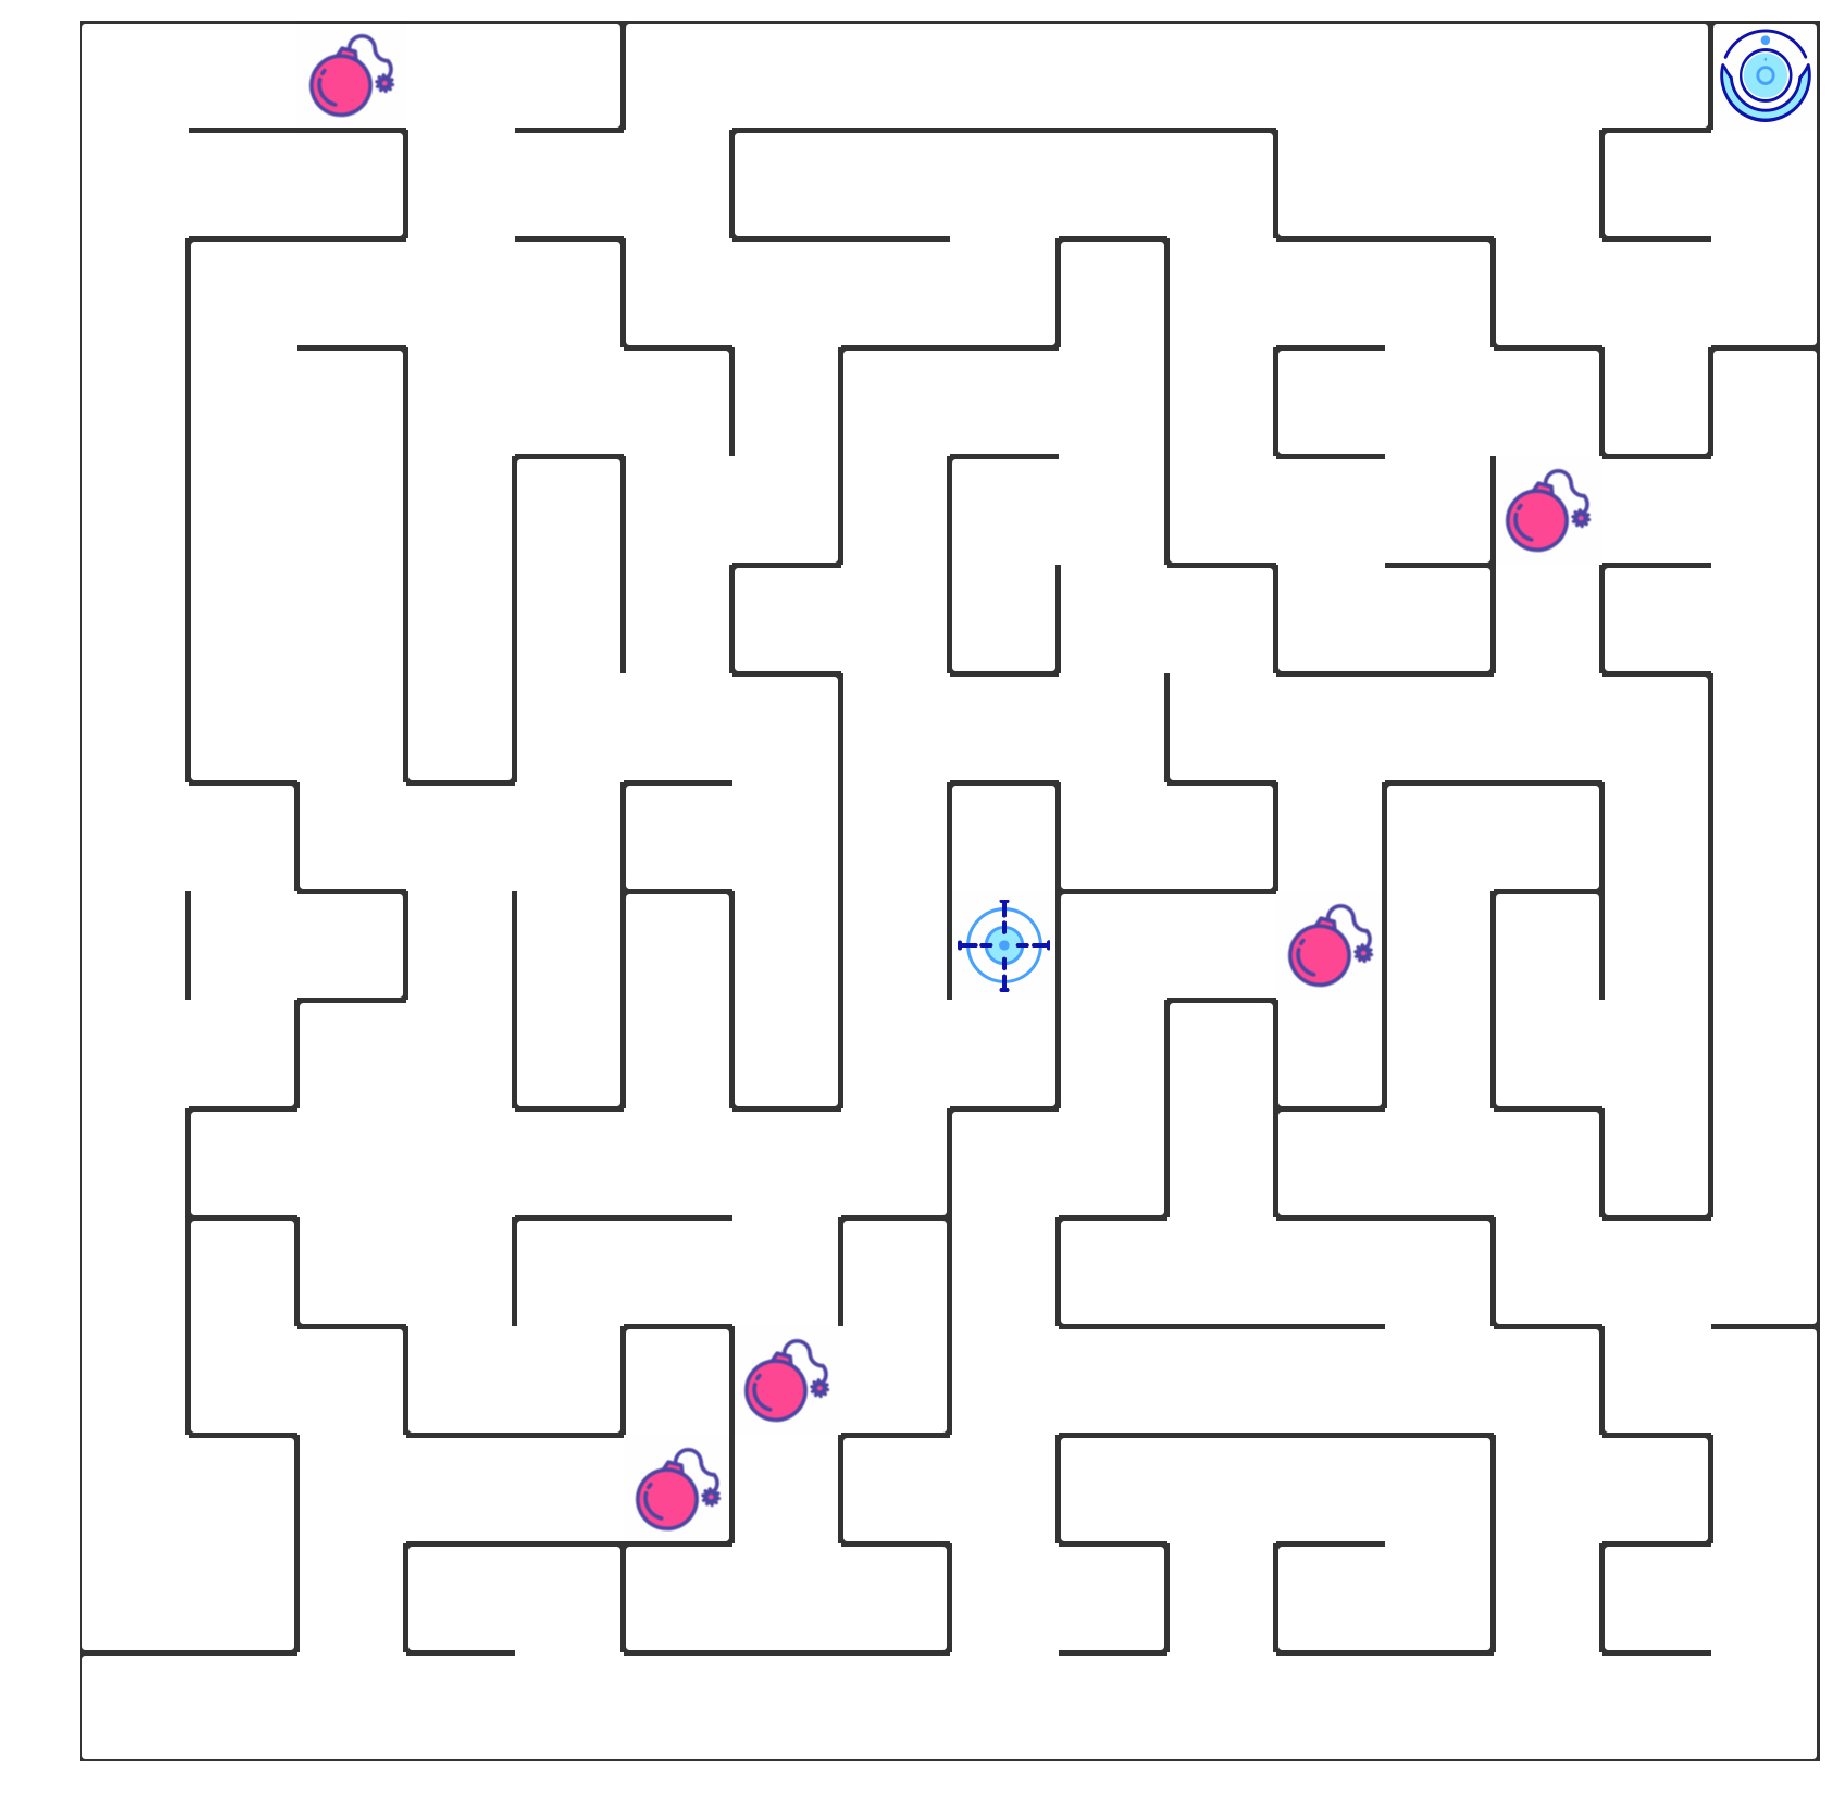

Maze of size (16, 16)


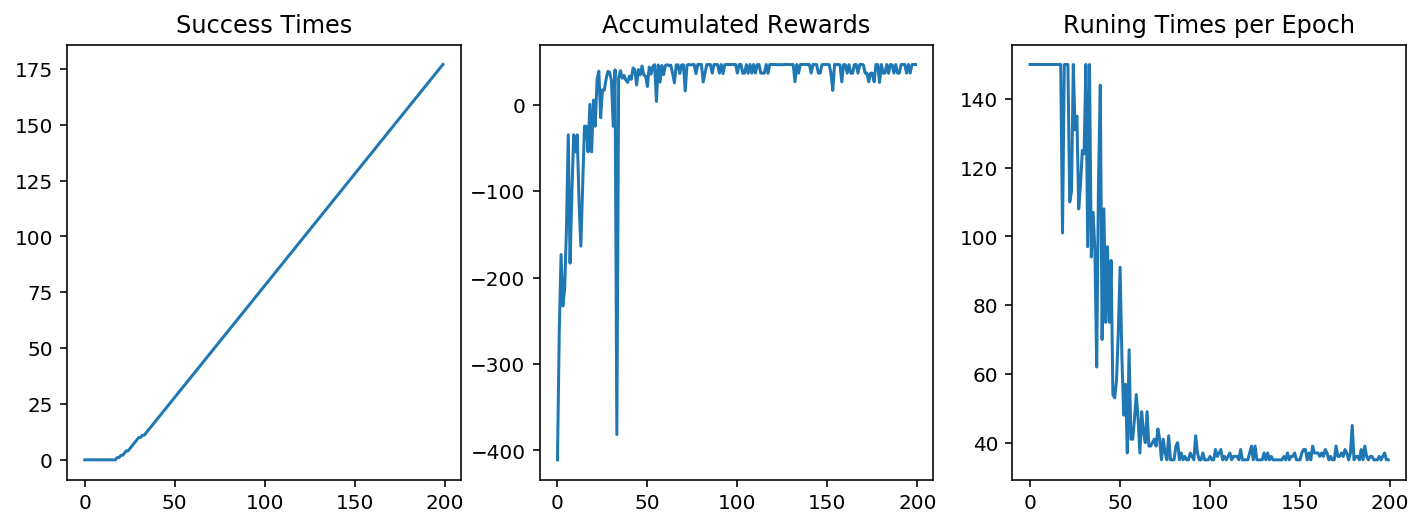

In [234]:
# try1d - more trap with ori episilon0
epoch = 200
epsilon0 = 0.3
alpha = 0.5
gamma = 0.9
maze_size = (16,16)
trap_number = 5

g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner1 = Runner(r, g)
runner1.run_training(epoch, display_direction=True)
print(g)
runner1.plot_results()

---

使用 `runner.plot_results()` 函数，能够打印机器人在训练过程中的一些参数信息。

- Success Times 代表机器人在训练过程中成功的累计次数，这应当是一个累积递增的图像。
- Accumulated Rewards 代表机器人在每次训练 epoch 中，获得的累积奖励的值，这应当是一个逐步递增的图像。
- Running Times per Epoch 代表在每次训练 epoch 中，小车训练的次数（到达终点就会停止该 epoch 转入下次训练），这应当是一个逐步递减的图像。

---

**问题 8**：使用 `runner.plot_results()` 输出训练结果，根据该结果对你的机器人进行分析。

- 指出你选用的参数如何，选用参数的原因。
- 建议你比较不同参数下机器人的训练的情况。
- 训练的结果是否满意，有何改进的计划。

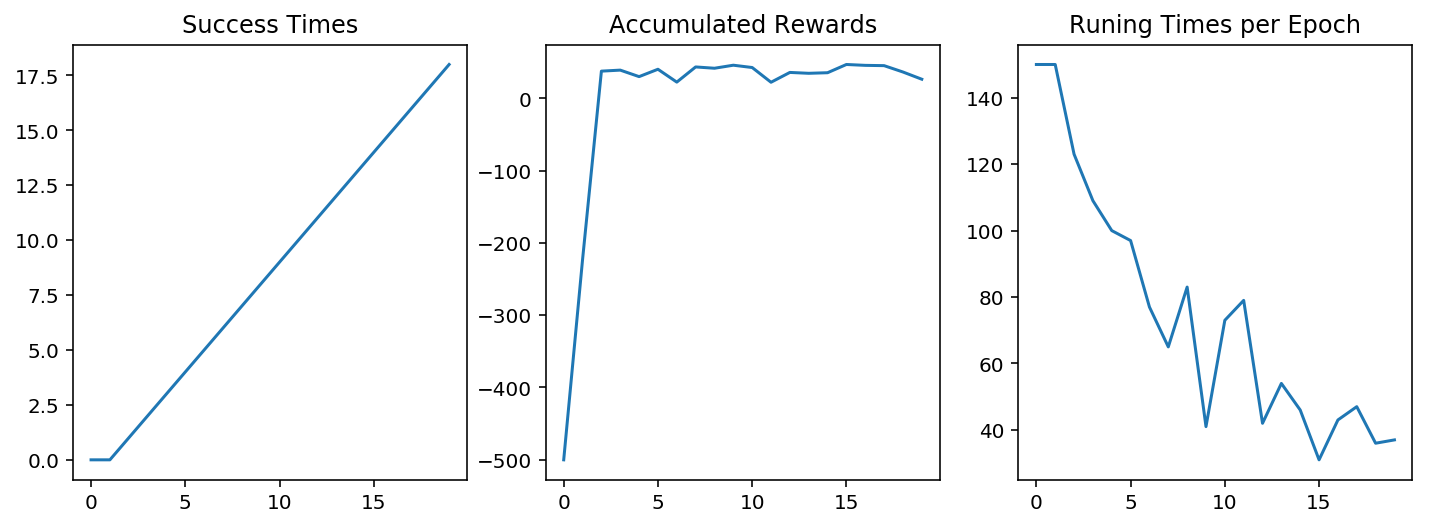

In [235]:
runner.plot_results()

(回答区)

**问题1**
环境为16*16时：
- epoch = 200（大部分100之后就收敛了）
- eposilon0 = 0.3 （太小和太大都会造成收敛慢，见try1b和try1c的结果
- alpha = 0.5 （新旧经验各50%）
- gamma = 0.9 （一般都是0.9）

**问题2**
上面try的几个记录（实际上改来改去有快100遍了）发现：
- eposilon0 = 0.3 会比较快的收敛
- 当trap越多，收敛越慢，且trap占的格数比例越大，收敛越慢（当到了10个，200epoch基本没有一次成功的）
- 结论和随机地图关系很大，有一次随机出来两个陷阱夹着目标，就没有跑出来

**问题3**
- 虽然跑出了结果，不是很满意：
    - 地图的随机性影响太大（尤其是trap多的时候）方法：可以循环调用，多次结果取平均数的方法来评定结果。
    - 寻找参数的方式比较费劲，试了好长时间。方法：写函数，对参数像 grid_search 类似的方式进行自动讯号。**请问老师：是否有这样的工具**
    - 尝试和寻找新的算法（后续复盘时候再考虑）

---

**问题 9：** 请将如下的文件打包，提交文件给审阅者。

- `robot.py`
- `robot_maze.ipynb`
- 由 `robot_maze.ipynb` 导出的 `robot_maze.html`